In [1]:
from pyspark.sql import SparkSession

In [2]:

spark=(SparkSession.builder.master("local").appName("Capstone Project")\
      .config("hive.metastore.uris","thrift://ip-10-1-2-24.ap-south-1.compute.internal:9083")\
      .enableHiveSupport().getOrCreate())
spark

# 1. EDA 

In [5]:
# importing all tables 
employees=spark.sql("select * from project_de.employees")
titles=spark.sql("select * from project_de.titles")
salaries=spark.sql("select * from project_de.salaries")
departments=spark.sql("select * from project_de.department")
department_manager=spark.sql("select * from project_de.department_manager")
department_employees=spark.sql("select * from project_de.department_employees")

In [22]:
tab = [employees,
titles,
salaries,
departments,
department_manager,
department_employees,]

In [26]:
for i in tab:
    print(type(i))

<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pyspark.sql.dataframe.DataFrame'>


In [27]:
for i in tab:
    print(i.printSchema())

root
 |-- emp_no: integer (nullable = true)
 |-- emp_titles_id: string (nullable = true)
 |-- birth_date: string (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- hire_date: string (nullable = true)
 |-- no_of_projects: integer (nullable = true)
 |-- last_performance_rating: string (nullable = true)
 |-- left_company: boolean (nullable = true)
 |-- last_date: string (nullable = true)

None
root
 |-- title_id: string (nullable = true)
 |-- title: string (nullable = true)

None
root
 |-- emp_no: integer (nullable = true)
 |-- salary: integer (nullable = true)

None
root
 |-- dept_no: string (nullable = true)
 |-- dept_name: string (nullable = true)

None
root
 |-- dept_no: string (nullable = true)
 |-- emp_no: integer (nullable = true)

None
root
 |-- emp_no: integer (nullable = true)
 |-- dept_no: string (nullable = true)

None


In [46]:
for i in tab:
    print('total records - ', i.count())

total records -  300024
total records -  7
total records -  300024
total records -  9
total records -  24
total records -  331603


In [54]:
for i in tab:
    i.describe().show()
    print('---------------------------------------------------------------------------------------')

+-------+------------------+-------------+----------+----------+---------+------+---------+------------------+-----------------------+---------+
|summary|            emp_no|emp_titles_id|birth_date|first_name|last_name|   sex|hire_date|    no_of_projects|last_performance_rating|last_date|
+-------+------------------+-------------+----------+----------+---------+------+---------+------------------+-----------------------+---------+
|  count|            300024|       300024|    300024|    300024|   300024|300024|   300024|            300024|                 300024|   300024|
|   mean|253321.76339226196|         null|      null|      null|     null|  null|     null| 5.504826280564221|                   null|     null|
| stddev|161828.23554037872|         null|      null|      null|     null|  null|     null|2.8720743310330183|                   null|     null|
|    min|             10001|        e0001|  1/1/1953|     Aamer|   Aamodt|     F| 1/1/1985|                 1|                    

In [4]:
#1  list showing employee number, last name, first name, sex, and salary for each employee
spark.sql('select e.emp_no, last_name, first_name, sex, salary from employees e inner join salaries s on e.emp_no=s.emp_no').show()

+------+-----------+----------+---+------+
|emp_no|  last_name|first_name|sex|salary|
+------+-----------+----------+---+------+
| 10001|    Facello|    Georgi|  M| 60117|
| 10002|     Simmel|   Bezalel|  F| 65828|
| 10003|    Bamford|     Parto|  M| 40006|
| 10004|    Koblick| Chirstian|  M| 40054|
| 10005|   Maliniak|   Kyoichi|  M| 78228|
| 10006|    Preusig|    Anneke|  F| 40000|
| 10007|  Zielinski|   Tzvetan|  F| 56724|
| 10008|   Kalloufi|    Saniya|  M| 46671|
| 10009|       Peac|    Sumant|  F| 60929|
| 10010|   Piveteau| Duangkaew|  F| 72488|
| 10011|      Sluis|      Mary|  F| 42365|
| 10012|  Bridgland|  Patricio|  M| 40000|
| 10013|     Terkki| Eberhardt|  M| 40000|
| 10014|      Genin|     Berni|  M| 46168|
| 10015|  Nooteboom|  Guoxiang|  M| 40000|
| 10016|Cappelletti|  Kazuhito|  M| 70889|
| 10017|  Bouloucos| Cristinel|  F| 71380|
| 10018|       Peha|  Kazuhide|  F| 55881|
| 10019|    Haddadi|   Lillian|  M| 44276|
| 10020|    Warwick|    Mayuko|  M| 40000|
+------+---

In [7]:
#2. A list showing first name, last name, and hire date for employees who were hired in 1986.

spark.sql('select first_name, last_name, hire_date from employees \
where cast(substring_index(hire_date,"/",-1) as int ) = 1986').show()

+----------+------------+----------+
|first_name|   last_name| hire_date|
+----------+------------+----------+
|    Georgi|     Facello| 6/26/1986|
|     Parto|     Bamford| 8/28/1986|
| Chirstian|     Koblick| 12/1/1986|
|    Sanjiv|    Zschoche|  2/4/1986|
|      Kwee|    Schusler| 2/26/1986|
|   Kshitij|        Gils| 3/27/1986|
|  Zhongwei|       Rosen|10/30/1986|
|   Xinglin|     Eugenio|  9/8/1986|
| Sudharsan|Flasterstein| 8/12/1986|
|    Kendra|     Hofting| 3/14/1986|
|    Hilari|      Morton| 7/15/1986|
|     Akemi|       Birch| 12/2/1986|
|    Lunjin|      Giveon| 10/2/1986|
|    Xuejia|      Ullian| 8/22/1986|
|   Chikara|    Rissland| 1/23/1986|
|  Domenick|    Peltason| 3/14/1986|
|    Zissis|    Pintelas| 2/11/1986|
|     Perry|   Shimshoni| 9/18/1986|
|  Kazuhito| Encarnacion| 8/21/1986|
|   Xiadong|       Perry| 11/5/1986|
+----------+------------+----------+
only showing top 20 rows



In [9]:
#3. A list showing the manager of each department with the following information: department number, department name, 
#  the manager's employee number, last name, first name.

spark.sql('select d.dept_no, d.dept_name, dm.emp_no, last_name, first_name from departments d \
inner join project_de.department_manager dm on d.dept_no = dm.dept_no \
inner join project_de.employees e on e.emp_no = dm.emp_no').show()

+-------+--------------------+------+------------+-----------+
|dept_no|           dept_name|emp_no|   last_name| first_name|
+-------+--------------------+------+------------+-----------+
|   d001|         "Marketing"|110022|  Markovitch|  Margareta|
|   d001|         "Marketing"|110039|    Minakawa|   Vishwani|
|   d002|           "Finance"|110085|       Alpin|       Ebru|
|   d002|           "Finance"|110114|  Legleitner|      Isamu|
|   d003|   "Human Resources"|110183|Ossenbruggen|    Shirish|
|   d003|   "Human Resources"|110228|     Sigstam|    Karsten|
|   d004|        "Production"|110303|     Wegerle|  Krassimir|
|   d004|        "Production"|110344|       Cools|     Rosine|
|   d004|        "Production"|110386|      Kieras|       Shem|
|   d004|        "Production"|110420|    Ghazalie|      Oscar|
|   d005|       "development"|110511|    Hagimont|   DeForest|
|   d005|       "development"|110567|    DasSarma|       Leon|
|   d006|"Quality Management"|110725|     Onuegbe|  Pet

In [11]:
#4. A list showing the department of each employee with the following information: employee number, last name, first 
#   name, and department name. 

spark.sql('select e.emp_no, last_name, first_name, d.dept_name from employees e \
inner join project_de.department_employees de on e.emp_no=de.emp_no \
inner join project_de.departments d on de.dept_no=d.dept_no').show()

+------+-----------+----------+--------------------+
|emp_no|  last_name|first_name|           dept_name|
+------+-----------+----------+--------------------+
| 10001|    Facello|    Georgi|       "development"|
| 10002|     Simmel|   Bezalel|             "Sales"|
| 10003|    Bamford|     Parto|        "Production"|
| 10004|    Koblick| Chirstian|        "Production"|
| 10005|   Maliniak|   Kyoichi|   "Human Resources"|
| 10006|    Preusig|    Anneke|       "development"|
| 10007|  Zielinski|   Tzvetan|          "Research"|
| 10008|   Kalloufi|    Saniya|       "development"|
| 10009|       Peac|    Sumant|"Quality Management"|
| 10010|   Piveteau| Duangkaew|"Quality Management"|
| 10010|   Piveteau| Duangkaew|        "Production"|
| 10011|      Sluis|      Mary|  "Customer Service"|
| 10012|  Bridgland|  Patricio|       "development"|
| 10013|     Terkki| Eberhardt|   "Human Resources"|
| 10014|      Genin|     Berni|       "development"|
| 10015|  Nooteboom|  Guoxiang|          "Rese

In [16]:
#5.A list showing first name, last name, and sex for employees whose first name is "Hercules" and last names begin with "B.“

spark.sql('select first_name, last_name, sex from employees where first_name="Hercules" and last_name like "B%"').show()

+----------+-------------+---+
|first_name|    last_name|sex|
+----------+-------------+---+
|  Hercules|   Benzmuller|  M|
|  Hercules|      Brendel|  F|
|  Hercules|   Baranowski|  M|
|  Hercules|     Barreiro|  M|
|  Hercules|         Baer|  M|
|  Hercules|Bernardinello|  F|
|  Hercules|      Basagni|  M|
|  Hercules|        Biran|  F|
|  Hercules|    Bernatsky|  M|
|  Hercules|         Bail|  F|
|  Hercules|        Birge|  F|
|  Hercules|      Bisiani|  F|
|  Hercules|       Bodoff|  M|
|  Hercules|        Biron|  F|
|  Hercules|      Buchter|  M|
|  Hercules|         Bain|  F|
|  Hercules|         Bahr|  M|
|  Hercules|         Baak|  M|
|  Hercules|     Benantar|  F|
|  Hercules|      Berstel|  F|
+----------+-------------+---+



In [18]:
#6. A list showing all employees in the Sales department, including their employee number, last name, first name, and 
#  department name.

spark.sql('select e.emp_no, last_name, first_name, d.dept_name from employees e \
inner join project_de.department_employees de on e.emp_no=de.emp_no \
inner join project_de.department d on de.dept_no=d.dept_no \
where d.dept_name ="Sales"').show()

+------+------------+----------+---------+
|emp_no|   last_name|first_name|dept_name|
+------+------------+----------+---------+
| 10002|      Simmel|   Bezalel|    Sales|
| 10016| Cappelletti|  Kazuhito|    Sales|
| 10034|        Swan|     Bader|    Sales|
| 10041|      Lenart|       Uri|    Sales|
| 10050|      Dredge|   Yinghua|    Sales|
| 10053|    Zschoche|    Sanjiv|    Sales|
| 10060| Billingsley|  Breannda|    Sales|
| 10061|      Herber|       Tse|    Sales|
| 10068|     Brattka|  Charlene|    Sales|
| 10087|     Eugenio|   Xinglin|    Sales|
| 10088|    Syrzycki|  Jungsoon|    Sales|
| 10089|Flasterstein| Sudharsan|    Sales|
| 10093|     Desikan|   Sailaja|    Sales|
| 10095|      Morton|    Hilari|    Sales|
| 10099|     Sullins|    Valter|    Sales|
| 10101|      Heyers|     Perla|    Sales|
| 10107|        Baca|      Dung|    Sales|
| 10125|     Hiltgen|     Syozo|    Sales|
| 10136|    Pintelas|    Zissis|    Sales|
| 10148|       Azumi|    Douadi|    Sales|
+------+---

In [19]:
#7.A list showing all employees in the Sales and Development departments, including their employee number, last name, 
#  first name, and department name.
 
spark.sql('select e.emp_no, last_name, first_name, d.dept_name from employees e \
inner join project_de.department_employees de on e.emp_no=de.emp_no \
inner join project_de.department d on de.dept_no=d.dept_no \
where d.dept_name IN ("Sales", "development")').show()

+------+-----------+----------+-----------+
|emp_no|  last_name|first_name|  dept_name|
+------+-----------+----------+-----------+
| 10001|    Facello|    Georgi|development|
| 10002|     Simmel|   Bezalel|      Sales|
| 10006|    Preusig|    Anneke|development|
| 10008|   Kalloufi|    Saniya|development|
| 10012|  Bridgland|  Patricio|development|
| 10014|      Genin|     Berni|development|
| 10016|Cappelletti|  Kazuhito|      Sales|
| 10018|       Peha|  Kazuhide|development|
| 10021|       Erde|     Ramzi|development|
| 10022|     Famili|    Shahaf|development|
| 10023| Montemayor|     Bojan|development|
| 10025|     Heyers| Prasadram|development|
| 10027|    Reistad|    Divier|development|
| 10028|   Tempesti|  Domenick|development|
| 10031|     Joslin|   Karsten|development|
| 10034|       Swan|     Bader|      Sales|
| 10037|   Makrucki|   Pradeep|development|
| 10040|    Meriste|     Weiyi|development|
| 10041|     Lenart|       Uri|      Sales|
| 10043|    Tzvieli|    Yishay|d

In [20]:
#8. A list showing the frequency count of employee last names, in descending order. ( i.e., how many employees share each last name

spark.sql('select last_name, count(*) as count_of_employee_last_name from employees \
group by last_name \
order by count_of_employee_last_name desc').show()

+-----------+---------------------------+
|  last_name|count_of_employee_last_name|
+-----------+---------------------------+
|       Baba|                        226|
|     Gelosh|                        223|
|      Coorg|                        223|
|    Sudbeck|                        222|
|     Farris|                        222|
|     Adachi|                        221|
|     Osgood|                        220|
|     Neiman|                        218|
|    Mandell|                        218|
|     Masada|                        218|
|Boudaillier|                        217|
|    Wendorf|                        217|
|     Mahnke|                        216|
|    Solares|                        216|
|     Pettis|                        216|
|   Cummings|                        216|
|     Emmart|                        215|
|    Kulisch|                        215|
|   Birjandi|                        215|
| Maksimenko|                        215|
+-----------+---------------------

In [25]:
#9. Histogram to show the salary distribution among the employees

salary_histogram=spark.sql('select cast(hist.x as int) as salary, cast(hist.y as bigint) as frequency_count from \
(select histogram_numeric(salary, 20) as A_hist \
from salaries) t \
lateral view explode(A_hist) exploded_table as hist')
salary_histogram.show()

+------+---------------+
|salary|frequency_count|
+------+---------------+
| 40137|         108834|
| 44331|          26476|
| 48695|          29510|
| 53440|          30087|
| 58232|          24609|
| 62954|          21554|
| 68499|          22627|
| 74140|          12348|
| 78817|           8624|
| 83367|           6011|
| 87753|           3774|
| 91865|           2417|
| 95952|           1506|
|100321|            817|
|104612|            432|
|108890|            234|
|113916|            116|
|119213|             38|
|124789|              9|
|129492|              1|
+------+---------------+



In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

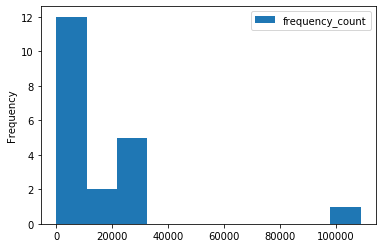

In [42]:
salary_histogram.toPandas().plot(x='salary', y='frequency_count', kind = 'hist')

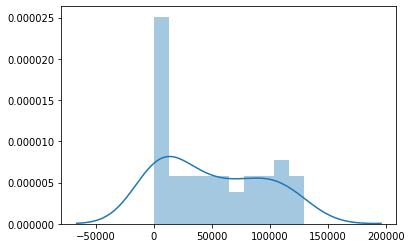

In [85]:
sns.distplot(salary_histogram.toPandas(), bins = 10, kde=True)

In [39]:
#10. Bar graph to show the Average salary per title (designation)

avg_bar=spark.sql('select t.title, avg(s.salary) as avg_salary from titles t \
inner join employees e on t.title_id = e.emp_titles_id \
inner join salaries s on e.emp_no = s.emp_no \
group by t.title')
avg_bar.show()

+------------------+------------------+
|             title|        avg_salary|
+------------------+------------------+
|             Staff| 58465.38285033152|
|Assistant Engineer| 48564.43444730077|
|      Senior Staff| 58550.17270435993|
|   Senior Engineer| 48506.79987109579|
|          Engineer|48535.336511426336|
|           Manager|51531.041666666664|
|  Technique Leader| 48582.89609189332|
+------------------+------------------+



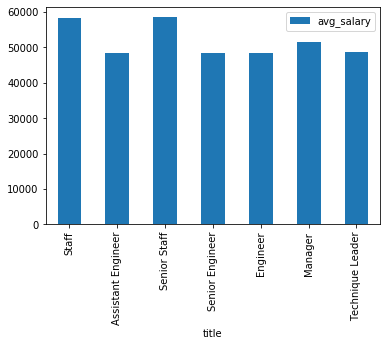

In [52]:
avg_bar.toPandas().plot(x='title', y='avg_salary', kind ='bar')

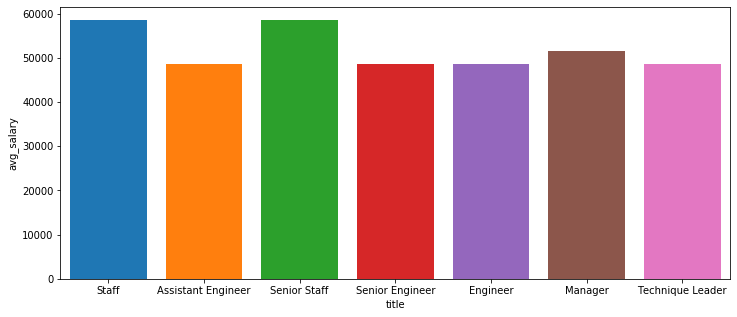

In [97]:
plt.figure(figsize=(12,5))
sns.barplot(data=avg_bar.toPandas(), x='title', y='avg_salary', saturation=1)
plt.show()

In [ ]:
#11. . Calculate employee tenure & show the tenure distribution among the employees

spark.sql('').show()

In [55]:
#12.a) how many employee have left the company 

spark.sql('select left_company, count(*) as employees_left_company from project_de.employees group by left_company').show()

+------------+----------------------+
|left_company|employees_left_company|
+------------+----------------------+
|        true|                 29867|
|       false|                270157|
+------------+----------------------+



In [56]:
#12.b) how many total employees per title in the company 

spark.sql('select t.title, count(e.emp_no) as total_employee_per_title from titles t \
inner join employees e on t.title_id = e.emp_titles_id \
group by t.title').show()

+------------------+------------------------+
|             title|total_employee_per_title|
+------------------+------------------------+
|             Staff|                  107384|
|Assistant Engineer|                    5835|
|      Senior Staff|                   26583|
|   Senior Engineer|                   97747|
|          Engineer|                   47303|
|           Manager|                      24|
|  Technique Leader|                   15148|
+------------------+------------------------+



In [104]:
#12.c) Total no employees per department in the company 

spark.sql('select d.dept_name, count(e.emp_no) as count_of_employee_per_department from employees e \
inner join project_de.department_employees de on e.emp_no=de.emp_no \
inner join project_de.department d on de.dept_no=d.dept_no \
group by dept_name order by count_of_employee_per_department desc').show()

+------------------+--------------------------------+
|         dept_name|count_of_employee_per_department|
+------------------+--------------------------------+
|       development|                           85707|
|        Production|                           73485|
|             Sales|                           52245|
|  Customer Service|                           23580|
|          Research|                           21126|
|         Marketing|                           20211|
|Quality Management|                           20117|
|   Human Resources|                           17786|
|           Finance|                           17346|
+------------------+--------------------------------+



In [114]:
# 12 c i) with left_company
spark.sql('select d.dept_name,left_company, count(e.emp_no) as count_of_employee_per_department from project_de.employees e \
inner join project_de.department_employees de on e.emp_no=de.emp_no \
inner join project_de.department d on de.dept_no=d.dept_no \
group by dept_name, left_company order by dept_name, left_company').show()

+------------------+------------+--------------------------------+
|         dept_name|left_company|count_of_employee_per_department|
+------------------+------------+--------------------------------+
|  Customer Service|       false|                           21166|
|  Customer Service|        true|                            2414|
|           Finance|       false|                           15699|
|           Finance|        true|                            1647|
|   Human Resources|       false|                           15989|
|   Human Resources|        true|                            1797|
|         Marketing|       false|                           18270|
|         Marketing|        true|                            1941|
|        Production|       false|                           66096|
|        Production|        true|                            7389|
|Quality Management|       false|                           18099|
|Quality Management|        true|                            2

In [103]:
#12.d) top 3 department where employees are leaving the company 

spark.sql('select d.dept_name, count(e.emp_no) as total_no_of_employees_left from project_de.employees e \
inner join project_de.department_employees de on e.emp_no=de.emp_no \
inner join project_de.department d on de.dept_no=d.dept_no \
where left_company = "true" group by dept_name order by total_no_of_employees_left desc').show()

+------------------+--------------------------+
|         dept_name|total_no_of_employees_left|
+------------------+--------------------------+
|       development|                      8508|
|        Production|                      7389|
|             Sales|                      5209|
|  Customer Service|                      2414|
|          Research|                      2098|
|Quality Management|                      2018|
|         Marketing|                      1941|
|   Human Resources|                      1797|
|           Finance|                      1647|
+------------------+--------------------------+



In [71]:
#12. e) 
salary_dist = spark.sql('select Salary_bins , count(emp_no) freq from project_de.salary_dist group by Salary_bins')
salary_dist.show()

+-----------+------+
|Salary_bins|  freq|
+-----------+------+
|    80 -90k| 11845|
|    60 -70k| 41413|
|      100k+|  1288|
|   90 -100k|  4284|
|    70 -80k| 24814|
|    50 -60k| 57915|
|     40-50k|158465|
+-----------+------+



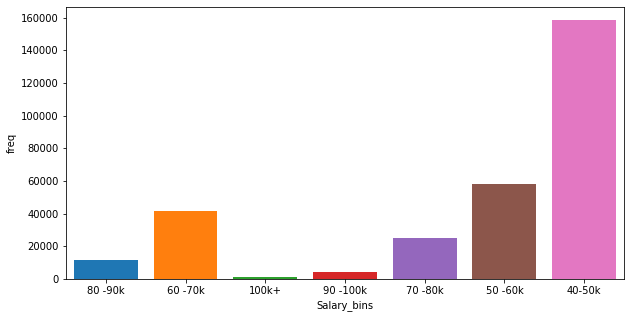

In [96]:
plt.figure(figsize=(10,5))
sns.barplot(data=salary_dist.toPandas(), x='Salary_bins', y='freq', saturation=1)
plt.show()

In [123]:
#12 f) list of emp_name, title, dept_name, salary for each employee

spark.sql('select concat(first_name," ",last_name) as name, title, dept_name, salary from project_de.employees e \
inner join project_de.salaries s on e.emp_no=s.emp_no \
inner join project_de.titles t on e.emp_titles_id=t.title_id \
inner join project_de.department_employees de on e.emp_no=de.emp_no \
inner join project_de.department d on de.dept_no=d.dept_no').show()

+--------------------+------------------+------------------+------+
|                name|             title|         dept_name|salary|
+--------------------+------------------+------------------+------+
|      Georgi Facello|   Senior Engineer|       development| 60117|
|      Bezalel Simmel|             Staff|             Sales| 65828|
|       Parto Bamford|   Senior Engineer|        Production| 40006|
|   Chirstian Koblick|   Senior Engineer|        Production| 40054|
|    Kyoichi Maliniak|             Staff|   Human Resources| 78228|
|      Anneke Preusig|   Senior Engineer|       development| 40000|
|   Tzvetan Zielinski|             Staff|          Research| 56724|
|     Saniya Kalloufi|Assistant Engineer|       development| 46671|
|         Sumant Peac|   Senior Engineer|Quality Management| 60929|
|  Duangkaew Piveteau|          Engineer|Quality Management| 72488|
|  Duangkaew Piveteau|          Engineer|        Production| 72488|
|          Mary Sluis|             Staff|  Custo

In [132]:
#12 g) performance wise count of employee at last year S being the top and PIP at last 

performance=employees.groupBy('last_performance_rating').count()
performance.show()

+-----------------------+------+
|last_performance_rating| count|
+-----------------------+------+
|                      B|107154|
|                      C| 71304|
|                      A| 95919|
|                      S| 10542|
|                    PIP| 15105|
+-----------------------+------+



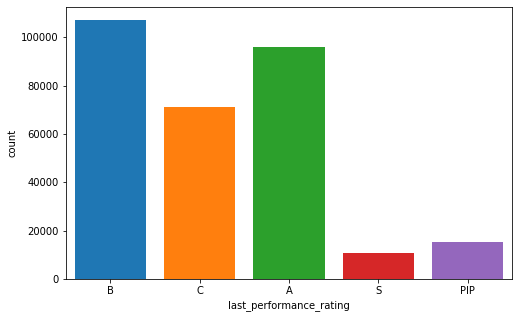

In [134]:
plt.figure(figsize=(8,5))
sns.barplot(data=performance.toPandas(), x='last_performance_rating', y='count', saturation=1)
plt.show()

###  -----------------EDA ends here -------------------------------